In [343]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm

In [345]:
# data formatting / cleaning
df = pd.read_csv('MLDS insurance.csv') 
df.drop_duplicates(inplace = True)

df_updated = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first = True)
bool_columns = df_updated.select_dtypes(include='bool').columns
df_updated[bool_columns] = df_updated[bool_columns].astype(int)

In [347]:
df_updated.head().T


,0,1,2,3,4
age,19.000,18.0000,28.000,33.00000,32.0000
bmi,27.900,33.7700,33.000,22.70500,28.8800
children,0.000,1.0000,3.000,0.00000,0.0000
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552
sex_male,0.000,1.0000,1.000,1.00000,1.0000
smoker_yes,1.000,0.0000,0.000,0.00000,0.0000
region_northwest,0.000,0.0000,0.000,1.00000,1.0000
region_southeast,0.000,1.0000,1.000,0.00000,0.0000
region_southwest,1.000,0.0000,0.000,0.00000,0.0000


In [349]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [351]:
# prepare data and split test and train
input = df_updated.drop(columns = ['charges'])
y = df['charges']

# 20% test
x_train, x_test, y_train, y_test = train_test_split(input, y, test_size = 0.2, random_state = 42)

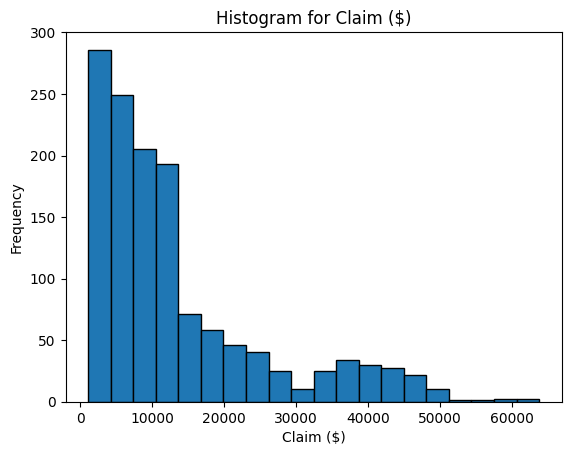

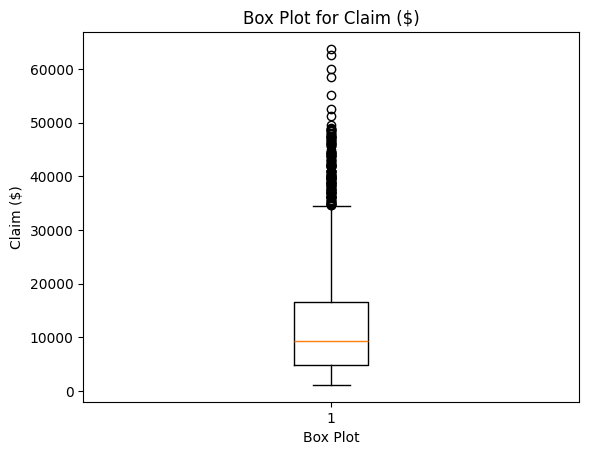

In [353]:
import matplotlib.pyplot as plt
#Checking Statistics for Claim column
stats = df_updated['charges'].describe()
# Creating a histogram
plt.hist(df_updated["charges"], bins=20, edgecolor='black')
# Adding titles and labels
plt.title('Histogram for Claim ($)')
plt.xlabel('Claim ($)')
plt.ylabel('Frequency')

# Display the histogram
stats
plt.show()

# Box plot
plt.boxplot(df_updated['charges'])
plt.title('Box Plot for Claim ($)')
plt.ylabel('Claim ($)')
plt.xlabel('Box Plot')
plt.show()

def assessing_model(y_test, y_pred):
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  import numpy as np
  import matplotlib.pyplot as plt

  # Calculating MSE
  mse = mean_squared_error(y_test, y_pred)

  # Calculating RMSE
  rmse = np.sqrt(mse)

  # Calculate R-squared
  r2 = r2_score(y_test, y_pred)

  print("Mean Squared Error (MSE):", round(mse,2))
  print("Root Mean Squared Error (RMSE):", round(rmse,2))
  print(f"R-squared: {round(r2,2)}")
  #print(f"Adjusted R-squared: {round(adjusted_r2,2)}")


  # Plotting predicted vs true values
  plt.scatter(y_pred, y_test, color='blue', label='True vs Predicted')
  plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='Ideal Fit')
  plt.title('Predicted vs True Values')
  plt.xlabel('Predicted Values')
  plt.ylabel('True Values')
  plt.legend()
  plt.show()
  return("done")

In [355]:
#simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

#make predictions with the data with the pipelie data in mind
y_pred = lin_reg.predict(x_test)

# Pipeline with Polynomial Features and Linear Regression

Methods Used: Basic model training with polynomial features and linear regression

Results:
R^2: 0.8825
RMSE: 4646.06
Mean Squared Error (MSE): 21585843.72
Root Mean Squared Error (RMSE): 4646.06
R-squared: 0.88


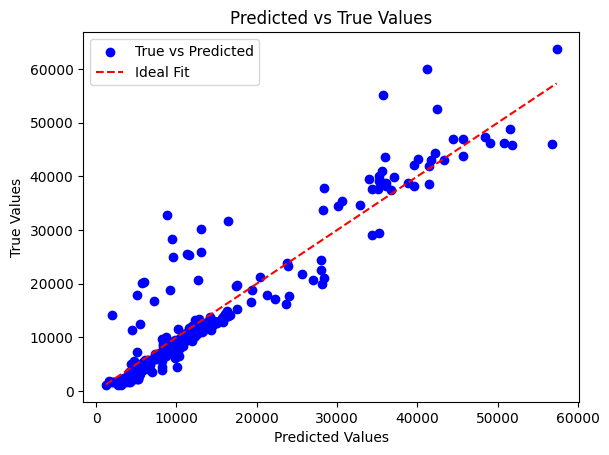

'done'

In [358]:
# basic model training (polynomial features + linear regression)

poly = PolynomialFeatures(degree = 2, include_bias = False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

lin_reg = LinearRegression()
lin_reg.fit(x_train_poly, y_train)

#make predictions with the data with the pipelie data in mind
y_pred = lin_reg.predict(x_test_poly)

x_train_poly_const = sm.add_constant(x_train_poly) # Add a constant column to the polynomial-transformed training data for OLS regression
model = sm.OLS(y_train, x_train_poly_const).fit() # Create and fit an Ordinary Least Squares (OLS) model with statsmodels

pipeline_description = 'Basic model training with polynomial features and linear regression'
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Methods
print(f"Methods Used: {pipeline_description}\n")
# Results
print("Results:")

print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {rmse(y_test, y_pred):.2f}")


assessing_model(y_test, y_pred)

# Polynomial Features, Standard Scaler, and Linear Regression

Methods Used: Pipeline with polynomial features, standard scaler, and linear regression

Results:
R^2: 0.8809
RMSE: 4677.94
Mean Squared Error (MSE): 21883083.95
Root Mean Squared Error (RMSE): 4677.94
R-squared: 0.88


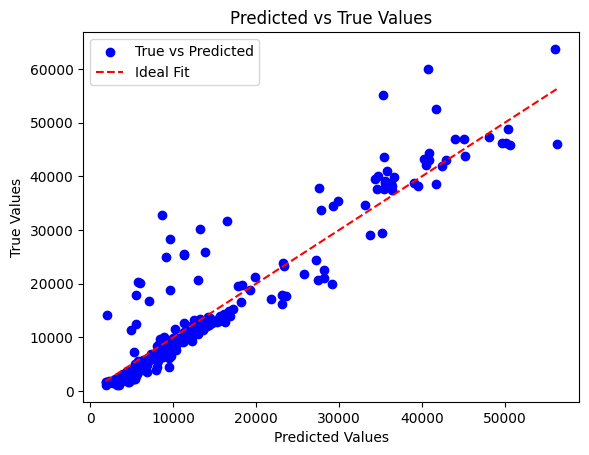

'done'

In [361]:
# Pipeline with Polynomial Features, Standard Scaler, and Linear Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

pipeline_description = 'Pipeline with polynomial features, standard scaler, and linear regression'
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)




# Methods
print(f"Methods Used: {pipeline_description}\n")

# Results
print("Results:")

print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {rmse(y_test, y_pred):.2f}")


assessing_model(y_test, y_pred)

# Pipeline with Polynomial Features and Ridge Regression

Methods Used: Pipeline with polynomial features ridge regression

Results:
R^2: 0.8828
RMSE: 4641.28
Mean Squared Error (MSE): 21541516.77
Root Mean Squared Error (RMSE): 4641.28
R-squared: 0.88


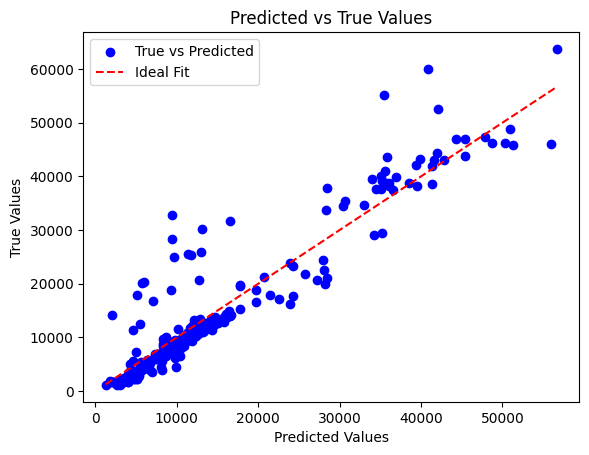

'done'

In [364]:
# Pipeline with Polynomial Features and Ridge Regression
pipeline_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('ridge', RidgeCV(alphas = np.logspace(-6, 6, 13), cv = 5))
])

pipeline_ridge.fit(x_train, y_train)
y_pred = pipeline_ridge.predict(x_test)
pipeline_description = 'Pipeline with polynomial features ridge regression'
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Methods
print(f"Methods Used: {pipeline_description}\n")

# Results
print("Results:")
print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {rmse(y_test, y_pred):.2f}")


assessing_model(y_test, y_pred)




# Pipeline with Polynomial Features and Lasso Regression

Methods Used: Pipeline with polynomial features and lasso regression

Results:
R^2: 0.8844
RMSE: 4608.85
Mean Squared Error (MSE): 21241467.09
Root Mean Squared Error (RMSE): 4608.85
R-squared: 0.88


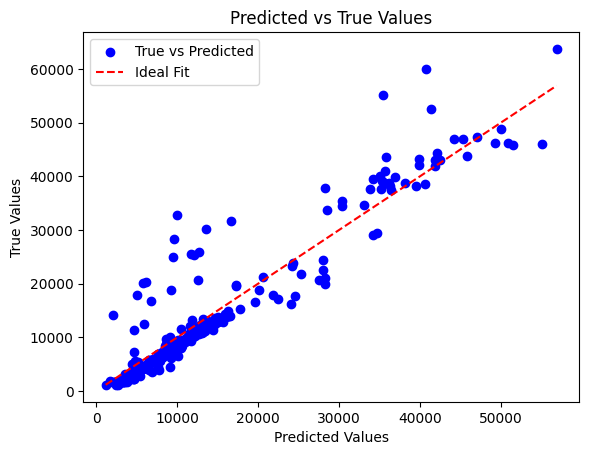

'done'

In [367]:
# Pipeline with Polynomial Features and Lasso Regression
pipeline_lasso = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('lasso', LassoCV(alphas = np.logspace(-6, 6, 13), max_iter = 10000, cv = 5))
])

pipeline_lasso.fit(x_train, y_train)
y_pred = pipeline_lasso.predict(x_test)

pipeline_description = 'Pipeline with polynomial features and lasso regression'

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Methods
print(f"Methods Used: {pipeline_description}\n")

# Results
print("Results:")
print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {rmse(y_test, y_pred):.2f}")


assessing_model(y_test, y_pred)

# Pipeline with Polynomial Features and ElasticNet

### Encompassing both Ridge and Lasso Regression

Methods Used: Pipeline with polynomial features and elastic net

Results:
R^2: 0.8592
RMSE: 5086.81
Mean Squared Error (MSE): 25875645.68
Root Mean Squared Error (RMSE): 5086.81
R-squared: 0.86


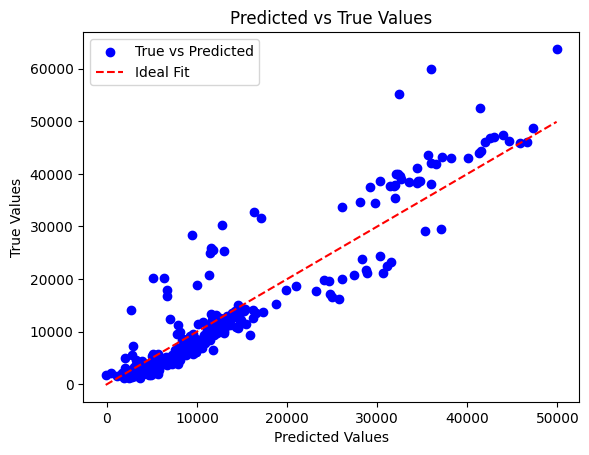

'done'

In [371]:
# Pipeline with Polynomial Features and ElasticNet

pipeline_elastic_net = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNetCV(l1_ratio = np.linspace(0.01, 1.0, 25), alphas = np.logspace(-6, 6, 13), cv = 5, max_iter = 100000, tol = 1e-1))
])

pipeline_elastic_net.fit(x_train, y_train)
y_pred = pipeline_elastic_net.predict(x_test)

pipeline_description = 'Pipeline with polynomial features and elastic net'
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Methods
print(f"Methods Used: {pipeline_description}\n")

# Results
print("Results:")
print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {rmse(y_test, y_pred):.2f}")


assessing_model(y_test, y_pred)

# Pipeline with Polynomial Features and Random Forest

Methods Used: Pipeline with polynomial features and random forest

Results:
R^2: 0.8739
RMSE: 4813.01
Mean Squared Error (MSE): 23165081.93
Root Mean Squared Error (RMSE): 4813.01
R-squared: 0.87


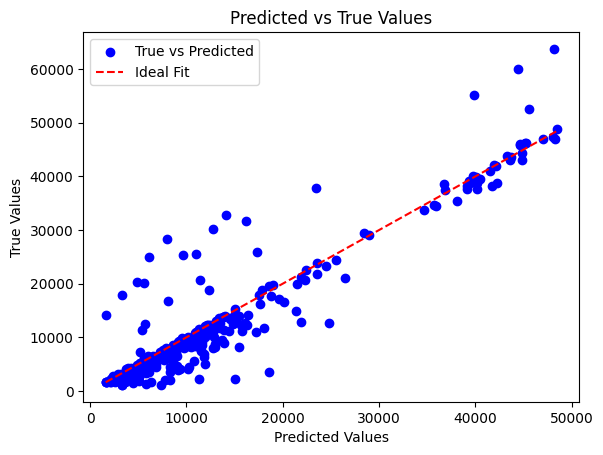

'done'

In [374]:
# Pipeline with Polynomial Features and Random Forest

pipeline_random_forest = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('Random Forest', RandomForestRegressor())
])

pipeline_random_forest.fit(x_train, y_train)
y_pred = pipeline_random_forest.predict(x_test)

pipeline_random_forest.fit(x_train, y_train)
y_pred = pipeline_random_forest.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

pipeline_description = 'Pipeline with polynomial features and random forest'

# Methods
print(f"Methods Used: {pipeline_description}\n")

# Results
print("Results:")
print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {rmse(y_test, y_pred):.2f}")


assessing_model(y_test, y_pred)

# Pipeline with Polynomial Features, Standard Scaler, Lasso, and Random Forest

Methods Used: Pipeline with polynomial features, standard scaler, lasso feature selection, and random forest regression

Results:
R^2: 0.8785
RMSE: 4725.88
Mean Squared Error (MSE): 22333987.64
Root Mean Squared Error (RMSE): 4725.88
R-squared: 0.88


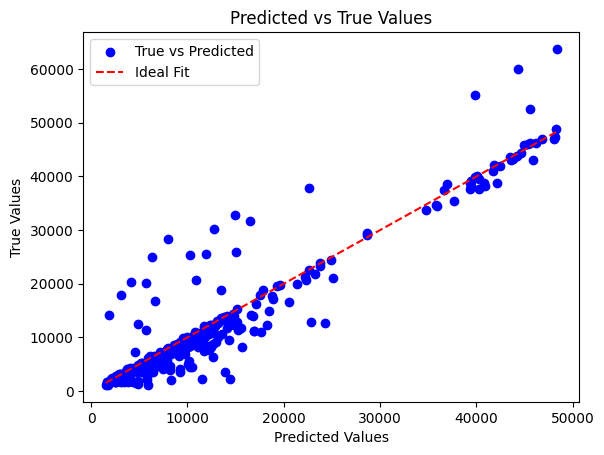

'done'

In [376]:
# Pipeline with Polynomial Features, Standard Scaler, Lasso, and Random Forest

pipeline_lasso_rf = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LassoCV(max_iter = 10000, cv = 5))),
    ('random_forest', RandomForestRegressor())
])

pipeline_lasso_rf.fit(x_train, y_train)
y_pred = pipeline_lasso_rf.predict(x_test)

pipeline_description = 'Pipeline with polynomial features, standard scaler, lasso feature selection, and random forest regression'


# Methods
print(f"Methods Used: {pipeline_description}\n")

# Results
print("Results:")
print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {rmse(y_test, y_pred):.2f}")

assessing_model(y_test, y_pred)

# Pipeline with Polynomial Features, Standard Scaler, Lasso, and Decision Tree

Methods Used: Pipeline with polynomial features, standard scaler,
lasso feature selection, and decision tree regression

Results:
R^2: 0.7445
RMSE: 6851.66
Mean Squared Error (MSE): 46945202.04
Root Mean Squared Error (RMSE): 6851.66
R-squared: 0.74


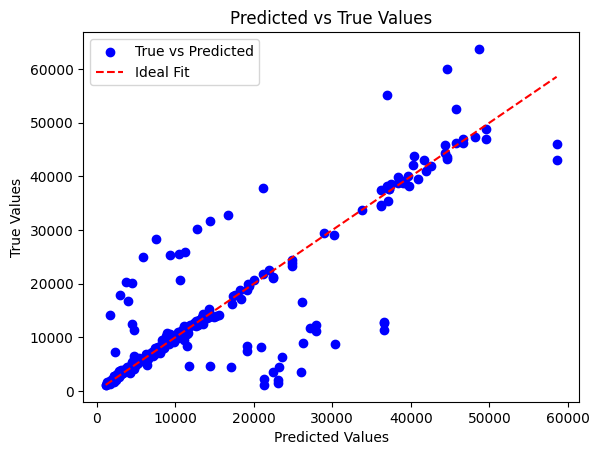

'done'

In [379]:
# Pipeline with Polynomial Features, Standard Scaler, Lasso, and Decision Tree

pipeline_combined = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(LassoCV(max_iter = 10000, cv = 5))),
    ('decision_tree', DecisionTreeRegressor())
])

pipeline_combined.fit(x_train, y_train)
y_pred = pipeline_combined.predict(x_test)

pipeline_description = 'Pipeline with polynomial features, standard scaler,\nlasso feature selection, and decision tree regression'



# Methods
print(f"Methods Used: {pipeline_description}\n")

# Results
print("Results:")
print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {rmse(y_test, y_pred):.2f}")

assessing_model(y_test, y_pred)

# Pipeline with Polynomial Features, Standard Scaler, and Lasso Regression

Methods Used: Pipeline with polynomial features, standard scaler, and lasso regression

Results:
R^2: 0.8842
RMSE: 4612.88
Mean Squared Error (MSE): 21278705.26
Root Mean Squared Error (RMSE): 4612.88
R-squared: 0.88


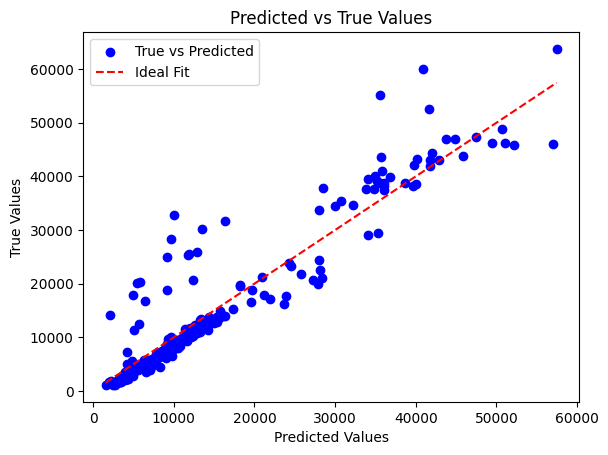

'done'

In [383]:
# Pipeline with Polynomial Features, Standard Scaler, and Lasso Regression
pipeline_scaler_lasso = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas = np.logspace(-6, 6, 13), max_iter = 10000, cv = 5))
])

pipeline_scaler_lasso.fit(x_train, y_train)
y_pred = pipeline_scaler_lasso.predict(x_test)

pipeline_description = 'Pipeline with polynomial features, standard scaler, and lasso regression'



# Methods
print(f"Methods Used: {pipeline_description}\n")

# Results
print("Results:")
print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {rmse(y_test, y_pred):.2f}")

assessing_model(y_test, y_pred)